In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from sympy import *

mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

init_printing(use_unicode=False, wrap_line=True)

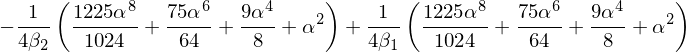

In [5]:
# Define symbols for orbital elements and constants
mu_i, mu_o, a_i, a_o, e_i, e_o, m3, n, G, H22 = \
symbols("\mu_i,\mu_o,a_i,a_o,e_i,e_o,m_3,n,G,\mathcal{H}_{22}", positive=True, real=True)
R_sec, R_res, R = symbols("\mathcal{R}_{sec}, \mathcal{R}_{res}, \mathcal{R}", real=True)
lambda_i, lambda_o, w_i, w_o = symbols("\lambda_i, \lambda_o, \omega_i, \omega_o", real=True)

# Define Poincaré variables
Lambda_i, Gamma_i, Z_i, Lambda_o, Gamma_o, Z_o, m12, m123\
    = symbols("\Lambda_i, Gamma_i, Z_i, \Lambda_o, Gamma_o, Z_o, m_{12}, m_{123}", real=True, positive=True)  
gamma_o, gamma_i = symbols("\gamma_o, \gamma_i", real=True)


def Ajm(alpha, beta1, beta2, j, m):
    """
    Calculates the coefficient Ajm in the literal expansion
    presented in RM2013.
    """
    if (m == 0):
        xi_m = Rational(1,2)
    else:
        xi_m = 1
        
    a1, a2, p_min, p = symbols("\\alpha_1  \\alpha2 p_{min} p", real=True)
    a1 = beta1*alpha; a2 = beta2*alpha
    
    def B_jm(a):
        p_min = Max(0, floor(Rational(1, 2)*(j - m + 1)))
        E_pjm = lambda p: 2*factorial(2*m + 2*p)*factorial(m + 2*p)*factorial(2*p)\
            /(4**(2*p + m)*factorial(j)*factorial(m + 2*p - j)*(factorial(p)*factorial(m + p))**2)
        
        return Sum(E_pjm(p)*alpha**(m + 2*p), (p, p_min, oo))
    
    return xi_m*Rational(1, 2)*(B_jm(a1)/beta1 - B_jm(a2)/beta2)
    
beta1, beta2, alpha = symbols("\\beta_1  \\beta_2 \\alpha", real=True)

Ajm(alpha, beta1, beta2, 1, 0).subs(oo, 4).doit()

# Secular disturbing function to 2nd order in eccentricity

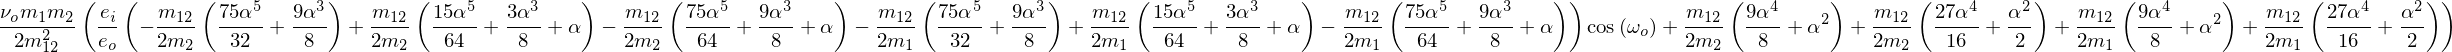

In [16]:
m1, m2, m12, m123, nu_o, nu_i = symbols(r'm_1 m_2 m_{12} m_{123} \nu_o \nu_i', positive=True, real=True)
omega_o = symbols(r"\omega_o", real=True)

edot = -Rational(1,2)*nu_o*(m1*m2/m12**2)*e_i*(Ajm(alpha, beta1, beta2, 0, 1)\
                                              - Ajm(alpha, beta1, beta2, 1, 1)\
                                              - Ajm(alpha, beta1, beta2, 2, 1))*sin(omega_o)

wdot = Rational(1,2)*nu_o*(m1*m2/m12**2)*(2*(Ajm(alpha, beta1, beta2, 1, 0) + Ajm(alpha, beta1, beta2, 2, 0))\
    + e_i/e_o*(Ajm(alpha, beta1, beta2, 0, 1) - Ajm(alpha, beta1, beta2, 1, 1) - Ajm(alpha, beta1, beta2, 2, 1))\
                                         *cos(omega_o))

edot = edot.subs(oo, 2).doit()
wdot = wdot.subs(oo, 2).doit()
wdot = wdot.subs({beta1: m1/m12,
          beta2: -m2/m12
          })
edot = edot.subs({beta1: m1/m12,
          beta2: -m2/m12
          })

In [ ]:
def hansen_inner(e, l, m, n):
    E = symbols("E", real=True)
    
    r = 1 - e*cos(E)
    M = E - e*sin(E)
    cosf = (cos(E) - e)/(1 - e*cos(E))
    sinf = sqrt(1 - e**2)*sin(E)/(1 - e*cos(E))

    integrand = series(r**(l + 1)*(cosf + I*sinf)**m*(cos(n*M) - I*sin(n*M)), e, 0, 6)
    return integrate(simplify(integrand), (E, 0, 2*pi))

def hansen_outer(e, l, m, n):
    E = symbols("E", real=True)
    r = 1 - e*cos(E)
    M = E - e*sin(E)
    cosf = (cos(E) - e)/(1 - e*cos(E))
    sinf = sqrt(1 - e**2)*sin(E)/(1 - e*cos(E))

    integrand = series((cosf - I*sinf)**m*(cos(n*M) + I*sin(n*M))/r**l, e, 0, 5)
    return integrate(integrand, (E, 0, 2*pi))
    

e = symbols("e", real=True, positive=True)

hansen_outer(e, 2, 2, 2)